In [1]:
import gym
import numpy as np
# some_file.py

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../Envs/gym-grid/gym_grid/envs/')

import gridworld as GW
from importlib import reload

onehot False


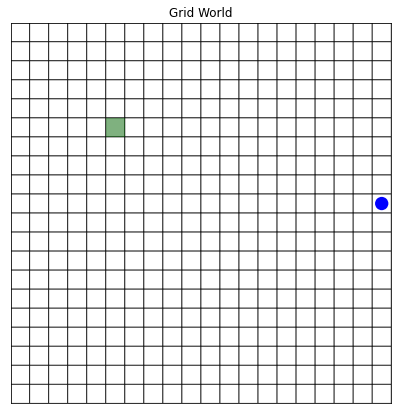

onehot False


In [2]:
reload(GW)
env = GW.GridWorld4()
#env = gym.make('gym_grid:gridworld-v1')
data_col = [[],[],[]]

# available actions in gridworld
acts = [x[0] for x in env.action_list]

# check functions of gridworld gym env
env.reset()

def get_action(s):
    return np.random.choice(acts)

In [3]:
maxsteps = 100

for step in range(maxsteps):
    s = env.get_state()
    state = env.get_observation()


    action = get_action(s)

    s_prime, r, done, __ = env.step(action)
    next_state = env.get_observation()

    print(s, action, s_prime, r)
    data_col[0].append(state)
    data_col[1].append(action)
    data_col[2].append(next_state)

    #env.render(0.05)

    if step == maxsteps-1 or done:
        #plt.show(block=True)
        pass

    if done:
        break



onehot False
onehot False
122 R 123 -0.01
onehot False
onehot False
123 U 103 -0.01
onehot False
onehot False
103 U 83 -0.01
onehot False
onehot False
83 L 82 -0.01
onehot False
onehot False
82 U 62 -0.01
onehot False
onehot False
62 L 61 -0.01
onehot False
onehot False
61 D 81 -0.01
onehot False
onehot False
81 U 61 -0.01
onehot False
onehot False
61 D 81 -0.01
onehot False
onehot False
81 L 80 -0.01
onehot False
onehot False
80 U 60 -0.01
onehot False
onehot False
60 D 80 -0.01
onehot False
onehot False
80 D 100 -0.01
onehot False
onehot False
100 U 80 -0.01
onehot False
onehot False
80 U 60 -0.01
onehot False
onehot False
60 R 61 -0.01
onehot False
onehot False
61 U 41 -0.01
onehot False
onehot False
41 R 42 -0.01
onehot False
onehot False
42 U 22 -0.01
onehot False
onehot False
22 U 2 -0.01
onehot False
onehot False
2 D 22 -0.01
onehot False
onehot False
22 L 21 -0.01
onehot False
onehot False
21 D 41 -0.01
onehot False
onehot False
41 R 42 -0.01
onehot False
onehot False
42 L 41 -

In [4]:
states = data_col[0]
actions = data_col[1]
n_state = data_col[2]

In [5]:
print(states[0].shape)

(3, 20, 20)


In [ ]:
## surya's class:
# Class for network
class SRNetNatureUnsup(nn.Module):
    def __init__(self, output_dim, hidden_units_sr=(512*4,), hidden_units_psi2q=(), gate=F.relu, config=1):
        """
        This network has two heads: SR head (SR) and reconstruction head (rec).
        config -> type of learning on top of state abstraction
            0 - typical SR with weights sharing
            1 - learning SR without weights sharing
        """
        super(SRNetNatureUnsup, self).__init__()
        self.feature_dim = 512
        self.output_dim = output_dim
        self.gate = gate
        in_channels = 4

        self.encoder = nn.Sequential(
            layer_init(nn.Conv2d(in_channels, 32, kernel_size=8, stride=4)),  # b, 16, 10, 10
            nn.ReLU(True),
            layer_init(nn.Conv2d(32, 64, kernel_size=4, stride=2)),
            nn.ReLU(True),
            layer_init(nn.Conv2d(64, 64, kernel_size=3, stride=1)),
            nn.ReLU(True),
            Flatten(),
            nn.Linear(7 * 7 * 64, self.feature_dim)
        )

        self.decoder = nn.Sequential(
            layer_init(nn.Linear(self.feature_dim, 7 * 7 * 64)),
            torch_reshape(into=[64, 7, 7]),
            layer_init(nn.ConvTranspose2d(64, 64, kernel_size=3, stride=1)),  # b, 16, 5, 5
            nn.ReLU(True),
            layer_init(nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2)),  # b, 16, 5, 5
            nn.ReLU(True),
            layer_init(nn.ConvTranspose2d(32, in_channels, kernel_size=8, stride=4, output_padding=0)),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.Tanh()
        )

        # layers for SR
        dims_sr = (self.feature_dim,) + hidden_units_sr + (self.feature_dim * output_dim,)
        self.layers_sr = nn.ModuleList(
            [layer_init_0(nn.Linear(dim_in, dim_out)) for dim_in, dim_out in zip(dims_sr[:-1], dims_sr[1:])])

    def forward(self, x):

        # Finding the latent layer
        phi = self.encoder(tensor(x)) # shape: b x state_dim

        # Reconstruction
        state_rec = self.decoder(phi)

        # Estimating the SR from the latent layer
        psi = phi
        for layer in self.layers_sr[:-1]:
            psi = self.gate(layer(psi))
        psi = self.layers_sr[-1](psi)
        psi = psi.view(psi.size(0), self.output_dim, self.feature_dim) # shape: b x action_dim x state_dim

        return dict(phi=phi, psi=psi, state_rec=state_rec)